In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import plotly.graph_objects as go

## Read Data

In [2]:
data_path = "../data/"

In [3]:
nifty50_stocks = ["COALINDIA", "HINDALCO", "TATASTEEL", "UPL", "SBILIFE", "HDFCLIFE", "ONGC", "JSWSTEEL", "TITAN", "M&M", 
                  "POWERGRID", "ADANIPORTS", "WIPRO", "RELIANCE", "TATAMOTORS", "CIPLA", "ITC", "NESTLEIND", "AXISBANK", 
                  "TCS", "TECHM", "BRITANNIA", "HCLTECH", "INFY", "NTPC", "DIVISLAB", "EICHERMOT", "BAJAJFINSV", "LT", 
                  "IOC", "TATACONSUM", "BPCL", "BHARTIARTL", "HINDUNILVR", "SUNPHARMA", "SHREECEM", "DRREDDY", "INDUSINDBK", 
                  "HDFC", "SBIN", "ULTRACEMCO", "BAJFINANCE", "GRASIM", "KOTAKBANK", "HEROMOTOCO", "BAJAJ-AUTO", "HDFCBANK", 
                  "ICICIBANK", "ASIANPAINT", "MARUTI"]

In [4]:
dataset = {}

In [5]:
for stock in nifty50_stocks:
    data = pd.read_csv(data_path + stock + ".csv", names=['Date', 'Open', 'High', 'Low', 'Close', 'Value', 'Volume', 'Trades'])
    dataset[stock] = data

## Check for missing values

In [6]:
for stock in nifty50_stocks:
    data = dataset[stock]
    null_cols = data.columns[data.isna().any()].tolist()
    if len(null_cols) > 0:
        print(f"Found missing values in {stock} for column {null_cols}")

## Calculate relative change in EOD data

In [7]:
for stock in nifty50_stocks:
    data = dataset[stock]
    data['ROpen'] = (data['Open'] - data['Close'].shift(1)) / data['Close'].shift(1)
    data['RHigh'] = (data['High'] - data['Close'].shift(1)) / data['Close'].shift(1)
    data['RLow'] = (data['Low'] - data['Close'].shift(1)) / data['Close'].shift(1)
    data['RClose'] = (data['Close'] - data['Close'].shift(1)) / data['Close'].shift(1)
    data['RVolume'] = (data['Volume'] - data['Volume'].shift(1)) / data['Volume'].shift(1)

## Relative change distribution

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:218: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


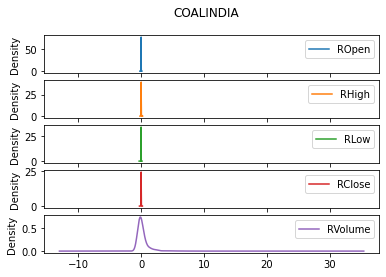

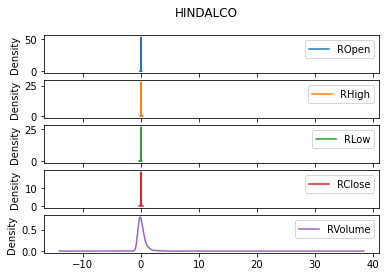

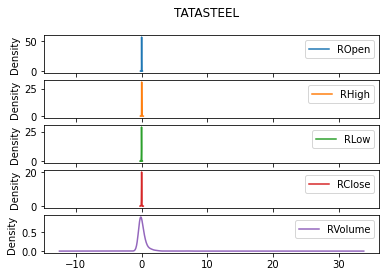

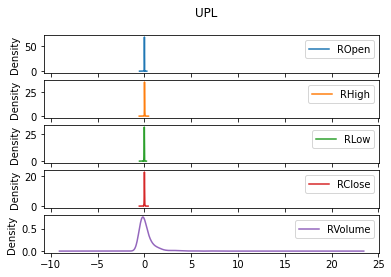

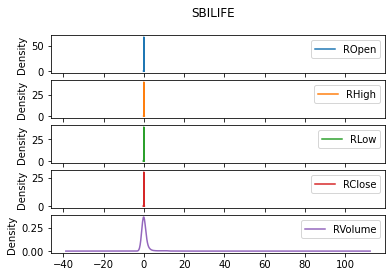

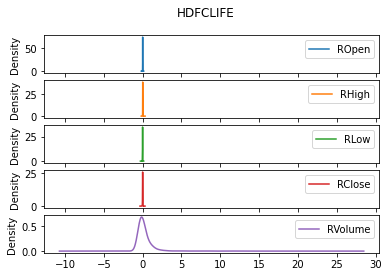

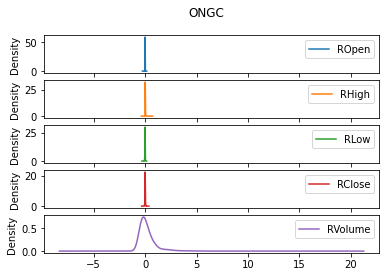

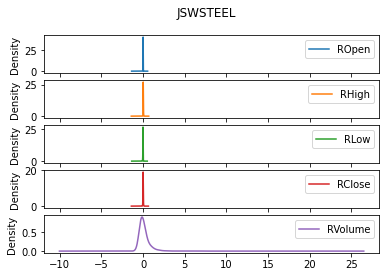

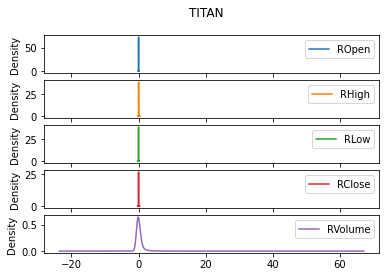

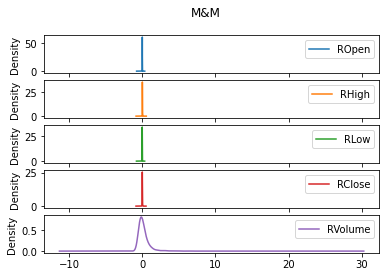

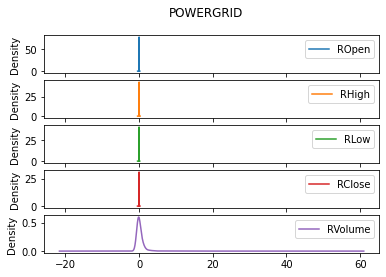

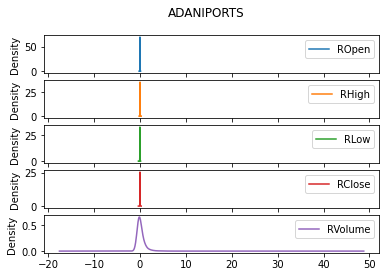

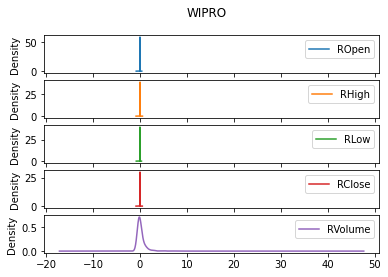

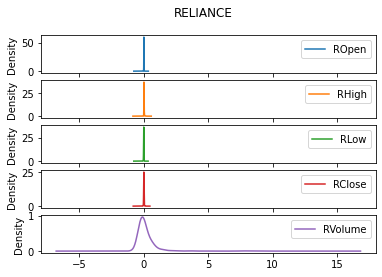

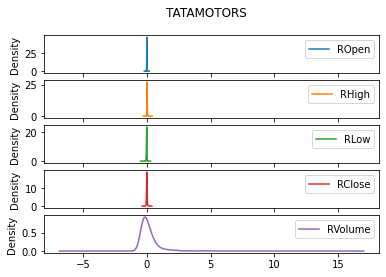

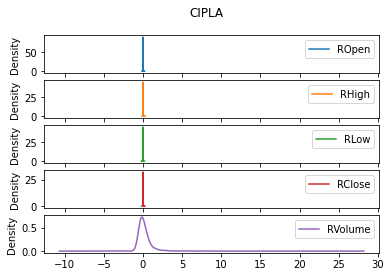

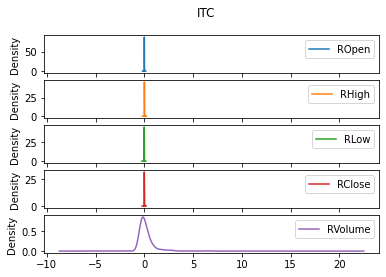

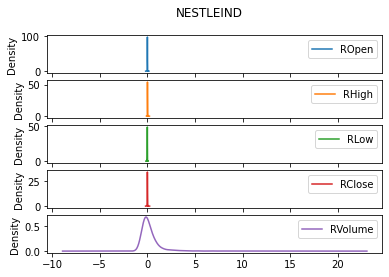

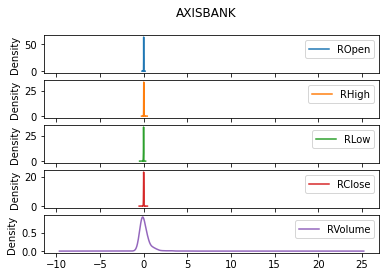

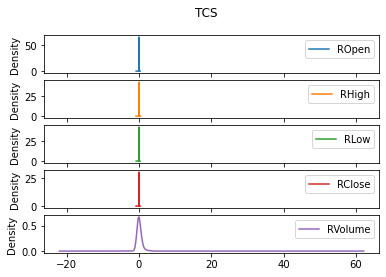

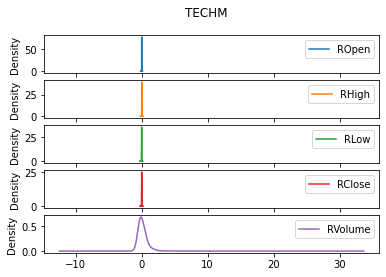

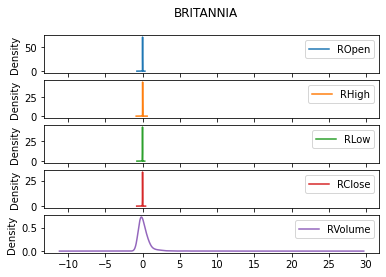

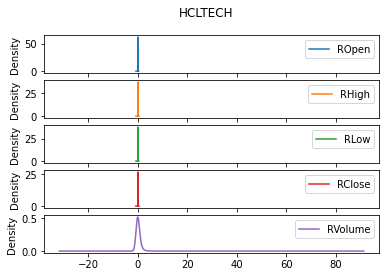

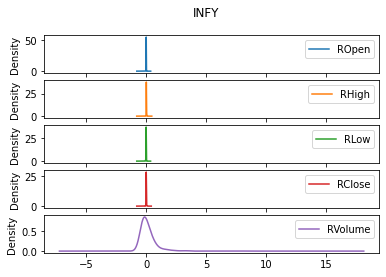

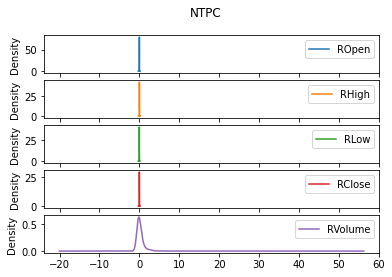

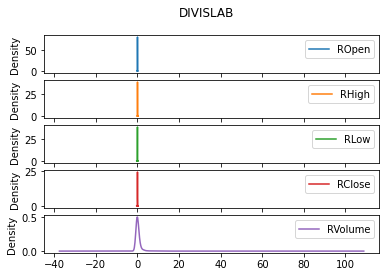

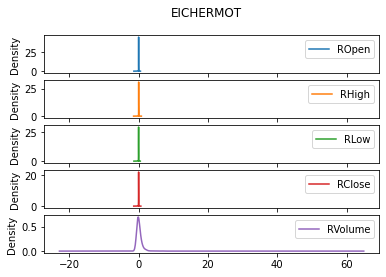

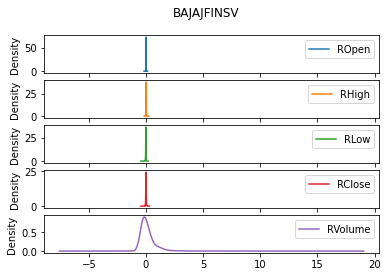

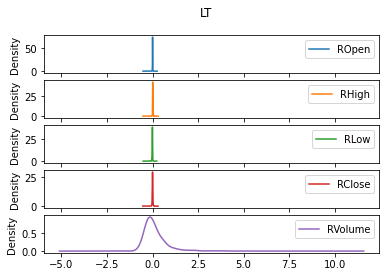

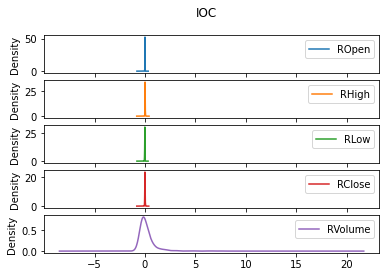

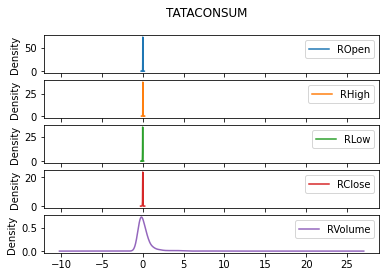

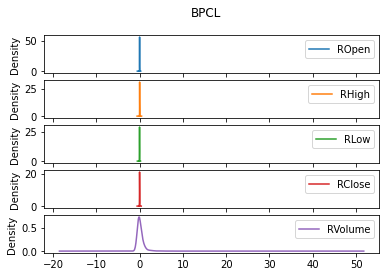

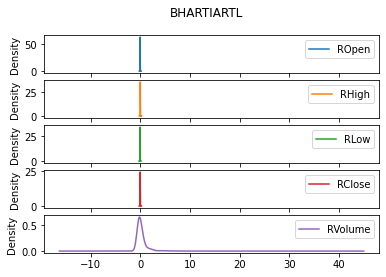

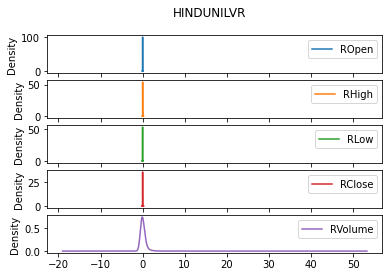

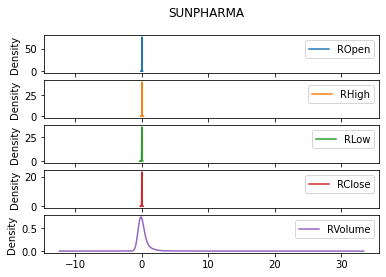

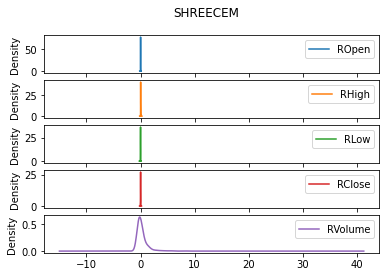

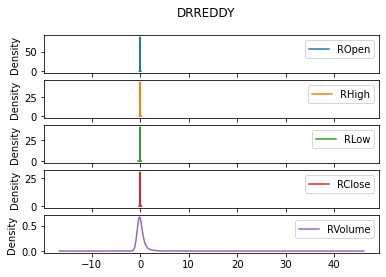

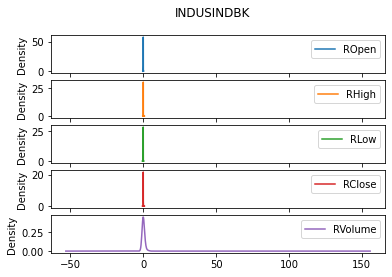

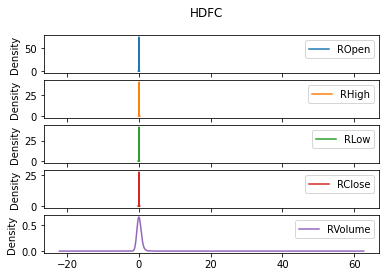

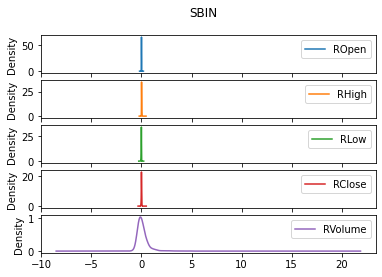

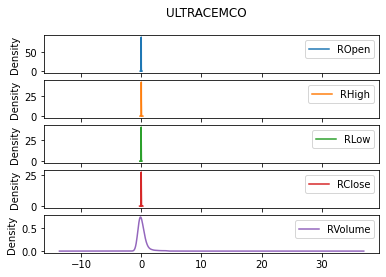

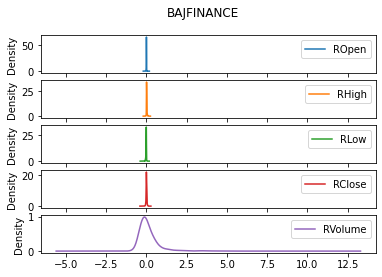

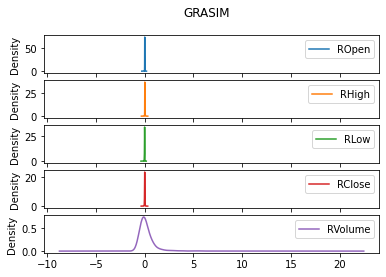

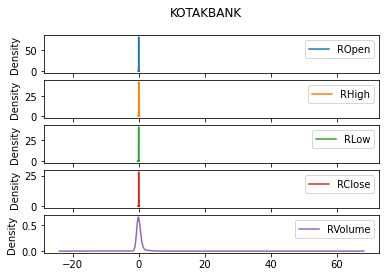

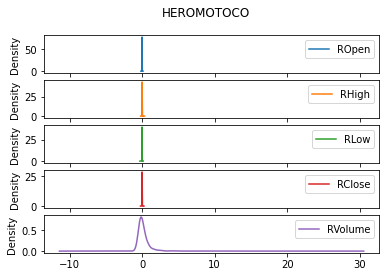

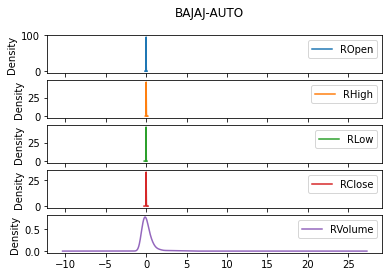

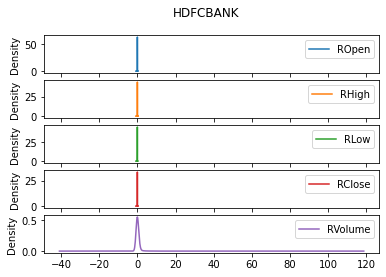

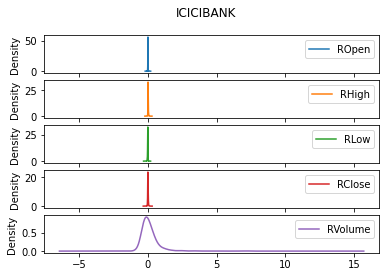

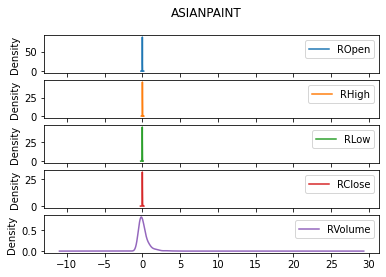

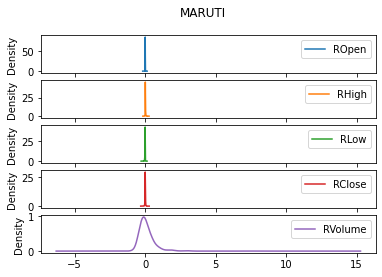

In [8]:
for stock in nifty50_stocks:
    data = dataset[stock]
    data[['ROpen', 'RHigh', 'RLow', 'RClose', 'RVolume']].plot(kind='kde', subplots=True, title=stock)

## Create combined dataset for clustering

In [9]:
cluster_dataset = pd.DataFrame()
for stock in nifty50_stocks:
    data = dataset[stock]
    data_temp = data[['ROpen', 'RHigh', 'RLow', 'RClose', 'RVolume']].copy()
    if cluster_dataset.empty:
        cluster_dataset = data_temp.copy()
    else:
        cluster_dataset = pd.concat([cluster_dataset, data_temp])

In [10]:
cluster_dataset.dropna(inplace=True)

## Normalizing data

In [11]:
#normalized_data = (cluster_dataset - cluster_dataset.min()) / (cluster_dataset.max() - cluster_dataset.min())

## Clustering - K means - finding K

In [12]:
sum_of_squared_distances = []
K = range(5,100)
for k in K:
    print(f"Running for K = {k}")
    km = KMeans(n_clusters=k)
    km = km.fit(cluster_dataset)
    sum_of_squared_distances.append(km.inertia_)

Running for K = 5
Running for K = 6
Running for K = 7
Running for K = 8
Running for K = 9
Running for K = 10
Running for K = 11
Running for K = 12
Running for K = 13
Running for K = 14
Running for K = 15
Running for K = 16
Running for K = 17
Running for K = 18
Running for K = 19
Running for K = 20
Running for K = 21
Running for K = 22
Running for K = 23
Running for K = 24
Running for K = 25
Running for K = 26
Running for K = 27
Running for K = 28
Running for K = 29
Running for K = 30
Running for K = 31
Running for K = 32
Running for K = 33
Running for K = 34
Running for K = 35
Running for K = 36
Running for K = 37
Running for K = 38
Running for K = 39
Running for K = 40
Running for K = 41
Running for K = 42
Running for K = 43
Running for K = 44
Running for K = 45
Running for K = 46
Running for K = 47
Running for K = 48
Running for K = 49
Running for K = 50
Running for K = 51
Running for K = 52
Running for K = 53
Running for K = 54
Running for K = 55
Running for K = 56
Running for K = 5

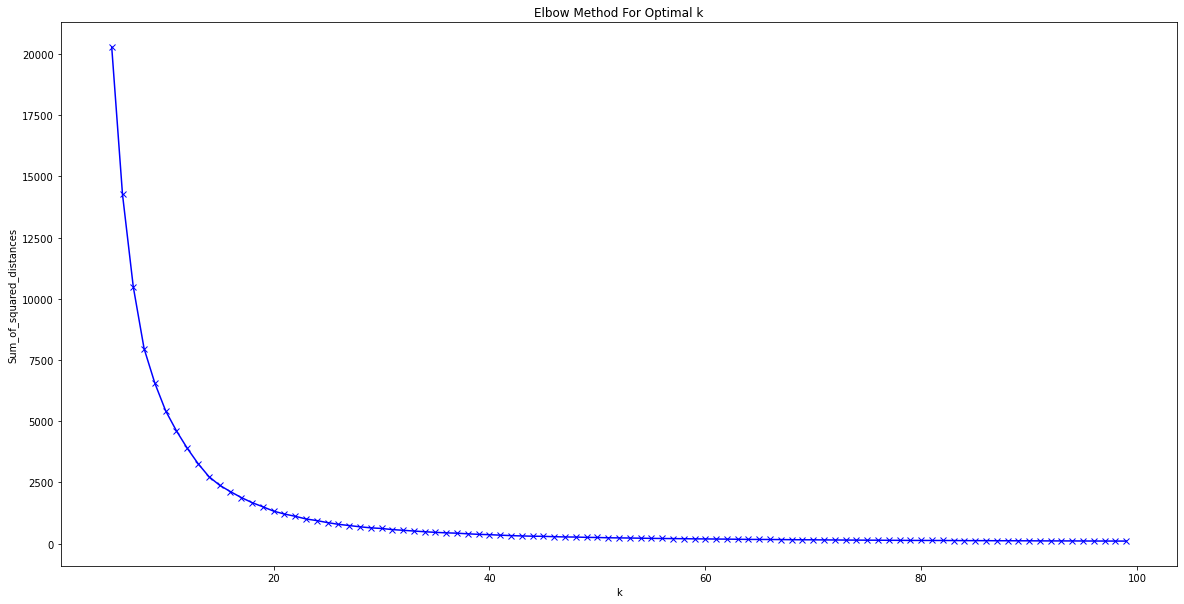

In [13]:
plt.figure(figsize=(20,10))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

## Cluster with K = 30

In [35]:
km = KMeans(n_clusters=30)
km = km.fit(cluster_dataset)

In [36]:
km.labels_

array([29, 27, 13, ..., 21,  4, 15])

## Allocating cluster labels to data

In [37]:
for stock in nifty50_stocks:
    data = dataset[stock]
    data.dropna(inplace=True)
    data['Cluster Label'] = km.predict(data[['ROpen', 'RHigh', 'RLow', 'RClose', 'RVolume']])

## Generating time series of cluster labels

In [45]:
def parse_date(d):
    d = str(d)
    year = d[-2:]
    month = d[-4:-2]
    day = d[:-4]
    return day + "/" + month + "/" + year

In [51]:
data = dataset['TATASTEEL']
# data['ParsedDate'] = data['Date'].apply(parse_date)
# data['ParsedDate'] = pd.to_datetime(data['ParsedDate'])
data

Date     Open     High      Low    Close         Value    Volume  \
1      30117   407.05   408.90   401.25   403.30  1.350334e+09   3338806   
2      40117   404.10   409.00   401.40   405.45  1.355743e+09   3344043   
3      50117   409.10   422.50   407.30   419.30  2.998973e+09   7196279   
4      60117   420.50   425.40   415.60   419.55  1.740484e+09   4138078   
5      90117   423.70   424.20   419.35   422.00  1.318463e+09   3122769   
...      ...      ...      ...      ...      ...           ...       ...   
1272  220222  1158.00  1166.65  1119.25  1138.70  1.070957e+10   9385857   
1273  230222  1148.00  1152.60  1134.00  1139.00  5.673217e+09   4960838   
1274  240222  1094.00  1119.95  1067.10  1074.00  1.328807e+10  12126867   
1275  250222  1097.70  1150.70  1095.60  1145.35  1.046735e+10   9212886   
1276  280222  1134.00  1225.00  1129.20  1220.75  2.107077e+10  17605446   

      Trades     ROpen     RHigh      RLow    RClose   RVolume  Cluster Label  \
1      33408  0.000738  0.005286 -0.013522 -0.008482 -0.401447             28   
2      39997  0.001984  0.014133 -0.004711  0.005331  0.001569             13   
3      79299  0.009002  0.042052  0.004563  0.034160  1.151970             10   
4      53562  0.002862  0.014548 -0.008824  0.000596 -0.424970             28   
5      40260  0.009892  0.011083 -0.000477  0.005840 -0.245358             15   
...      ...       ...       ...       ...       ...       ...            ...   
1272  222627 -0.020180 -0.012861 -0.052968 -0.036511  0.885190             10   
1273  129498  0.008167  0.012207 -0.004128  0.000263 -0.471456             28   
1274  324643 -0.039508 -0.016725 -0.063126 -0.057068  1.444520              2   
1275  226899  0.022067  0.071415  0.020112  0.066434 -0.240291             15   
1276  408543 -0.009910  0.069542 -0.014100  0.065831  0.910959             10   

     ParsedDate  
1    2017-03-01  
2    2017-04-01  
3    2017-05-01  
4    2017-06-01  
5    2017-09-01  
...         ...  
1272 2022-02-22  
1273 2022-02-23  
1274 2022-02-24  
1275 2022-02-25  
1276 2022-02-28  

[1276 rows x 15 columns]

## Analyzing patterns in time series

In [85]:
cluster_timeseries = {}
cluster_timeseries_str = {}
for stock in nifty50_stocks:
    data = dataset[stock]
    ts = list(data['Cluster Label'])
    cluster_timeseries[stock] = ts
    ts_str = ' '.join(map(str, ts)).strip()
    cluster_timeseries_str[stock] = ts_str

In [57]:
# km.cluster_centers_

In [66]:
def unique_subsequence(seq, size):
    result = []
    for i in range(0, len(seq) - size):
        if seq[i:i+size] not in result:
            result.append(seq[i:i+size])
    return result

## For sub sequence of size 3

In [69]:
size3_seq = []
for stock in nifty50_stocks:
    data = cluster_timeseries[stock]
    r = unique_subsequence(data, 3)
    for s in r:
        if s not in size3_seq:
            size3_seq.append(s)

In [70]:
len(size3_seq)

3132

In [90]:
size3_freq = {}

In [91]:
for seq in size3_seq:
    s = ' '.join(map(str,seq)).strip()
    for stock in nifty50_stocks:
        ts = cluster_timeseries_str[stock]
        s_count = ts.count(s)
        if s in size3_freq.keys():
            size3_freq[s] = s_count + size3_freq[s]
        else:
            size3_freq[s] = s_count

In [95]:
sorted_size3 = dict(sorted(size3_freq.items(), key=lambda item: item[1], reverse=True))

In [113]:
sorted_size3

{'8 13 2': 859,
 '8 29 2': 829,
 '8 15 2': 777,
 '8 8 2': 768,
 '8 27 2': 662,
 '8 8 1': 611,
 '13 29 2': 545,
 '15 8 2': 513,
 '8 4 2': 511,
 '13 15 2': 504,
 '13 13 2': 501,
 '15 13 2': 499,
 '29 13 2': 496,
 '15 29 2': 482,
 '29 29 2': 474,
 '29 8 2': 463,
 '13 8 2': 460,
 '8 28 2': 453,
 '4 15 2': 439,
 '29 13 1': 437,
 '15 27 2': 431,
 '27 15 2': 424,
 '15 15 2': 415,
 '9 27 2': 414,
 '8 21 2': 414,
 '29 15 2': 410,
 '29 27 2': 404,
 '4 28 2': 403,
 '28 13 2': 403,
 '28 8 2': 396,
 '15 8 1': 396,
 '15 13 1': 384,
 '29 4 2': 381,
 '15 4 2': 366,
 '27 13 2': 364,
 '13 27 2': 360,
 '28 27 2': 358,
 '7 28 2': 354,
 '15 27 1': 351,
 '27 29 2': 349,
 '4 29 2': 346,
 '27 28 2': 335,
 '28 29 2': 334,
 '0 28 2': 331,
 '4 28 1': 319,
 '13 15 1': 316,
 '0 15 2': 309,
 '4 13 2': 308,
 '15 4 1': 307,
 '13 4 2': 307,
 '28 4 2': 304,
 '2 28 2': 304,
 '0 29 2': 299,
 '21 28 2': 297,
 '15 21 2': 296,
 '13 28 2': 290,
 '8 8 29': 290,
 '8 10 2': 289,
 '28 15 2': 286,
 '21 15 2': 285,
 '8 29 13': 283

In [101]:
for (k,v) in sorted_size3.items():
    print(f"[{k}] occured {v/len(size3_freq)*100} %")

[8 13 2] occured 27.426564495530016 %
[8 29 2] occured 26.468710089399742 %
[8 15 2] occured 24.808429118773947 %
[8 8 2] occured 24.521072796934863 %
[8 27 2] occured 21.136653895274584 %
[8 8 1] occured 19.50830140485313 %
[13 29 2] occured 17.40102171136654 %
[15 8 2] occured 16.379310344827587 %
[8 4 2] occured 16.315453384418902 %
[13 15 2] occured 16.091954022988507 %
[13 13 2] occured 15.996168582375478 %
[15 13 2] occured 15.932311621966793 %
[29 13 2] occured 15.836526181353769 %
[15 29 2] occured 15.389527458492976 %
[29 29 2] occured 15.134099616858238 %
[29 8 2] occured 14.782886334610474 %
[13 8 2] occured 14.687100893997446 %
[8 28 2] occured 14.46360153256705 %
[4 15 2] occured 14.016602809706258 %
[29 13 1] occured 13.952745849297573 %
[15 27 2] occured 13.761174968071519 %
[27 15 2] occured 13.537675606641125 %
[15 15 2] occured 13.250319284802043 %
[9 27 2] occured 13.218390804597702 %
[8 21 2] occured 13.218390804597702 %
[29 15 2] occured 13.090676883780333 %
[29 27

[22 28 14] occured 0.09578544061302681 %
[21 0 9] occured 0.09578544061302681 %
[0 9 29] occured 0.09578544061302681 %
[0 27 14] occured 0.09578544061302681 %
[4 9 0] occured 0.09578544061302681 %
[10 14 0] occured 0.09578544061302681 %
[27 10 10] occured 0.09578544061302681 %
[24 0 21] occured 0.09578544061302681 %
[0 22 4] occured 0.09578544061302681 %
[27 13 6] occured 0.09578544061302681 %
[6 13 27] occured 0.09578544061302681 %
[24 4 0] occured 0.09578544061302681 %
[28 28 0] occured 0.09578544061302681 %
[27 14 29] occured 0.09578544061302681 %
[13 22 10] occured 0.09578544061302681 %
[21 29 6] occured 0.09578544061302681 %
[4 21 10] occured 0.09578544061302681 %
[24 28 8] occured 0.09578544061302681 %
[4 10 27] occured 0.09578544061302681 %
[0 1 27] occured 0.09578544061302681 %
[2 8 4] occured 0.09578544061302681 %
[10 24 28] occured 0.09578544061302681 %
[4 0 9] occured 0.09578544061302681 %
[0 19 4] occured 0.09578544061302681 %
[0 0 19] occured 0.09578544061302681 %
[17 0 21

## For sub sequence of size 4

In [73]:
size4_seq = []
for stock in nifty50_stocks:
    data = cluster_timeseries[stock]
    r = unique_subsequence(data, 4)
    for s in r:
        if s not in size4_seq:
            size4_seq.append(s)

In [74]:
len(size4_seq)

16235

In [102]:
size4_freq = {}

In [103]:
for seq in size4_seq:
    s = ' '.join(map(str,seq)).strip()
    for stock in nifty50_stocks:
        ts = cluster_timeseries_str[stock]
        s_count = ts.count(s)
        if s in size4_freq.keys():
            size4_freq[s] = s_count + size4_freq[s]
        else:
            size4_freq[s] = s_count

In [106]:
sorted_size4 = dict(sorted(size4_freq.items(), key=lambda item: item[1], reverse=True))

In [107]:
sorted_size4

{'8 13 13 2': 131,
 '8 8 29 2': 126,
 '8 8 13 2': 125,
 '8 13 29 2': 118,
 '8 13 15 2': 114,
 '8 13 8 2': 114,
 '8 29 29 2': 114,
 '8 29 8 2': 113,
 '8 27 15 2': 113,
 '8 8 15 2': 111,
 '8 15 13 2': 110,
 '8 29 13 2': 109,
 '8 15 8 2': 109,
 '8 29 27 2': 99,
 '8 15 27 2': 98,
 '29 13 8 2': 97,
 '8 8 8 2': 97,
 '8 4 15 2': 96,
 '8 27 13 2': 94,
 '8 15 29 2': 93,
 '8 27 29 2': 92,
 '8 29 4 2': 92,
 '15 8 15 2': 90,
 '29 13 29 2': 90,
 '8 15 27 1': 90,
 '8 15 4 2': 89,
 '13 8 29 2': 85,
 '13 8 13 2': 83,
 '15 29 8 2': 82,
 '15 8 29 2': 82,
 '8 29 15 2': 81,
 '8 4 28 2': 81,
 '8 4 13 2': 81,
 '13 13 29 2': 80,
 '13 29 13 2': 79,
 '15 13 27 2': 79,
 '13 29 8 2': 79,
 '29 27 13 2': 78,
 '29 13 13 2': 78,
 '29 8 29 2': 78,
 '29 13 15 2': 77,
 '8 13 27 2': 77,
 '8 27 28 2': 77,
 '29 27 15 2': 76,
 '13 29 29 2': 75,
 '13 13 13 2': 75,
 '15 13 29 2': 74,
 '8 13 4 2': 74,
 '8 13 28 2': 73,
 '15 13 13 2': 73,
 '13 8 15 2': 73,
 '4 15 29 2': 72,
 '15 8 13 2': 72,
 '15 29 29 2': 71,
 '29 29 8 2': 71

In [105]:
for (k,v) in sorted_size4.items():
    print(f"[{k}] occured {v/len(size4_freq)*100} %")

[8 13 13 2] occured 0.8068986757006468 %
[8 8 29 2] occured 0.7761010163227595 %
[8 8 13 2] occured 0.769941484447182 %
[8 13 29 2] occured 0.7268247613181398 %
[8 13 15 2] occured 0.70218663381583 %
[8 13 8 2] occured 0.70218663381583 %
[8 29 29 2] occured 0.70218663381583 %
[8 29 8 2] occured 0.6960271019402525 %
[8 27 15 2] occured 0.6960271019402525 %
[8 8 15 2] occured 0.6837080381890976 %
[8 15 13 2] occured 0.6775485063135201 %
[8 29 13 2] occured 0.6713889744379427 %
[8 15 8 2] occured 0.6713889744379427 %
[8 29 27 2] occured 0.6097936556821681 %
[8 15 27 2] occured 0.6036341238065907 %
[29 13 8 2] occured 0.5974745919310133 %
[8 8 8 2] occured 0.5974745919310133 %
[8 4 15 2] occured 0.5913150600554358 %
[8 27 13 2] occured 0.5789959963042809 %
[8 15 29 2] occured 0.5728364644287034 %
[8 27 29 2] occured 0.5666769325531259 %
[8 29 4 2] occured 0.5666769325531259 %
[15 8 15 2] occured 0.554357868801971 %
[29 13 29 2] occured 0.554357868801971 %
[8 15 27 1] occured 0.554357868801

[28 13 29 29] occured 0.09239297813366185 %
[29 29 13 21] occured 0.09239297813366185 %
[13 13 29 21] occured 0.09239297813366185 %
[8 15 22 28] occured 0.09239297813366185 %
[21 29 29 15] occured 0.09239297813366185 %
[29 4 15 27] occured 0.09239297813366185 %
[4 15 15 13] occured 0.09239297813366185 %
[4 28 13 28] occured 0.09239297813366185 %
[13 13 27 8] occured 0.09239297813366185 %
[8 28 27 28] occured 0.09239297813366185 %
[29 8 13 8] occured 0.09239297813366185 %
[13 21 28 13] occured 0.09239297813366185 %
[10 15 8 15] occured 0.09239297813366185 %
[13 4 28 4] occured 0.09239297813366185 %
[15 15 21 29] occured 0.09239297813366185 %
[4 8 28 27] occured 0.09239297813366185 %
[15 4 8 13] occured 0.09239297813366185 %
[15 8 29 8] occured 0.09239297813366185 %
[0 29 13 15] occured 0.09239297813366185 %
[0 28 15 8] occured 0.09239297813366185 %
[2 13 28 2] occured 0.09239297813366185 %
[8 8 15 28] occured 0.09239297813366185 %
[15 15 29 29] occured 0.09239297813366185 %
[28 21 29 29

[15 4 4 13] occured 0.04311672312904219 %
[21 15 21 15] occured 0.04311672312904219 %
[27 29 29 21] occured 0.04311672312904219 %
[10 28 4 28] occured 0.04311672312904219 %
[4 4 15 28] occured 0.04311672312904219 %
[28 27 4 29] occured 0.04311672312904219 %
[0 2 0 29] occured 0.04311672312904219 %
[27 15 15 29] occured 0.04311672312904219 %
[2 8 28 13] occured 0.04311672312904219 %
[27 15 27 4] occured 0.04311672312904219 %
[13 21 0 8] occured 0.04311672312904219 %
[0 27 13 8] occured 0.04311672312904219 %
[15 15 8 15] occured 0.04311672312904219 %
[29 13 4 4] occured 0.04311672312904219 %
[15 10 15 4] occured 0.04311672312904219 %
[4 0 27 8] occured 0.04311672312904219 %
[27 29 27 8] occured 0.04311672312904219 %
[15 8 21 0] occured 0.04311672312904219 %
[8 4 4 4] occured 0.04311672312904219 %
[27 29 15 22] occured 0.04311672312904219 %
[0 27 27 28] occured 0.04311672312904219 %
[27 29 4 27] occured 0.04311672312904219 %
[28 15 10 28] occured 0.04311672312904219 %
[28 22 28 29] occure

[8 29 4 10] occured 0.024638127502309825 %
[4 21 28 27] occured 0.024638127502309825 %
[10 15 29 10] occured 0.024638127502309825 %
[0 13 15 21] occured 0.024638127502309825 %
[13 14 0 27] occured 0.024638127502309825 %
[10 13 29 27] occured 0.024638127502309825 %
[13 29 27 10] occured 0.024638127502309825 %
[15 10 8 13] occured 0.024638127502309825 %
[13 13 8 10] occured 0.024638127502309825 %
[28 10 13 28] occured 0.024638127502309825 %
[29 10 29 13] occured 0.024638127502309825 %
[4 8 8 29] occured 0.024638127502309825 %
[29 21 21 28] occured 0.024638127502309825 %
[21 21 28 4] occured 0.024638127502309825 %
[8 15 2 8] occured 0.024638127502309825 %
[29 2 0 10] occured 0.024638127502309825 %
[15 21 15 28] occured 0.024638127502309825 %
[21 0 21 15] occured 0.024638127502309825 %
[13 8 28 22] occured 0.024638127502309825 %
[4 28 4 10] occured 0.024638127502309825 %
[28 4 10 0] occured 0.024638127502309825 %
[27 2 0 15] occured 0.024638127502309825 %
[15 10 29 8] occured 0.02463812750

[14 28 8 8] occured 0.012319063751154912 %
[28 8 15 14] occured 0.012319063751154912 %
[15 14 15 0] occured 0.012319063751154912 %
[2 27 15 13] occured 0.012319063751154912 %
[0 15 0 20] occured 0.012319063751154912 %
[0 4 0 15] occured 0.012319063751154912 %
[10 2 15 28] occured 0.012319063751154912 %
[29 27 27 22] occured 0.012319063751154912 %
[27 27 22 28] occured 0.012319063751154912 %
[27 22 28 8] occured 0.012319063751154912 %
[8 24 0 0] occured 0.012319063751154912 %
[0 0 15 21] occured 0.012319063751154912 %
[0 15 21 4] occured 0.012319063751154912 %
[13 10 10 0] occured 0.012319063751154912 %
[10 10 0 8] occured 0.012319063751154912 %
[21 4 27 29] occured 0.012319063751154912 %
[27 29 0 4] occured 0.012319063751154912 %
[29 0 4 27] occured 0.012319063751154912 %
[0 4 27 15] occured 0.012319063751154912 %
[21 4 28 21] occured 0.012319063751154912 %
[13 15 6 15] occured 0.012319063751154912 %
[15 6 15 13] occured 0.012319063751154912 %
[29 29 4 10] occured 0.012319063751154912 

[28 28 2 27] occured 0.012319063751154912 %
[21 10 28 21] occured 0.012319063751154912 %
[14 28 0 8] occured 0.012319063751154912 %
[4 14 0 15] occured 0.012319063751154912 %
[0 15 13 17] occured 0.012319063751154912 %
[15 14 15 8] occured 0.012319063751154912 %
[14 15 8 13] occured 0.012319063751154912 %
[27 8 15 14] occured 0.012319063751154912 %
[0 8 0 9] occured 0.012319063751154912 %
[9 4 27 27] occured 0.012319063751154912 %
[0 29 21 29] occured 0.012319063751154912 %
[27 22 15 28] occured 0.012319063751154912 %
[1 0 29 15] occured 0.012319063751154912 %
[29 27 4 4] occured 0.012319063751154912 %
[4 13 6 28] occured 0.012319063751154912 %
[8 27 6 0] occured 0.012319063751154912 %
[28 22 15 4] occured 0.012319063751154912 %
[4 4 13 8] occured 0.012319063751154912 %
[0 29 27 10] occured 0.012319063751154912 %
[27 28 2 29] occured 0.012319063751154912 %
[29 21 22 28] occured 0.012319063751154912 %
[22 29 4 13] occured 0.012319063751154912 %
[29 4 13 0] occured 0.012319063751154912 %

[10 0 28 22] occured 0.006159531875577456 %
[4 15 13 19] occured 0.006159531875577456 %
[15 13 19 15] occured 0.006159531875577456 %
[13 19 15 29] occured 0.006159531875577456 %
[19 15 29 28] occured 0.006159531875577456 %
[13 8 29 17] occured 0.006159531875577456 %
[8 29 17 28] occured 0.006159531875577456 %
[29 17 28 8] occured 0.006159531875577456 %
[17 28 8 29] occured 0.006159531875577456 %
[4 28 0 17] occured 0.006159531875577456 %
[28 0 17 4] occured 0.006159531875577456 %
[17 4 28 8] occured 0.006159531875577456 %
[22 29 13 29] occured 0.006159531875577456 %
[15 14 29 29] occured 0.006159531875577456 %
[14 29 29 29] occured 0.006159531875577456 %
[27 15 14 29] occured 0.006159531875577456 %
[27 8 2 13] occured 0.006159531875577456 %
[13 28 10 10] occured 0.006159531875577456 %
[27 10 8 0] occured 0.006159531875577456 %
[21 28 29 28] occured 0.006159531875577456 %
[10 13 27 13] occured 0.006159531875577456 %
[10 8 29 27] occured 0.006159531875577456 %
[27 29 28 22] occured 0.006

[15 27 0 21] occured 0.006159531875577456 %
[27 0 21 4] occured 0.006159531875577456 %
[27 13 28 6] occured 0.006159531875577456 %
[13 28 6 28] occured 0.006159531875577456 %
[4 15 21 21] occured 0.006159531875577456 %
[28 13 6 0] occured 0.006159531875577456 %
[0 27 8 8] occured 0.006159531875577456 %
[28 15 22 13] occured 0.006159531875577456 %
[4 28 29 9] occured 0.006159531875577456 %
[28 29 9 29] occured 0.006159531875577456 %
[29 9 29 28] occured 0.006159531875577456 %
[4 27 8 22] occured 0.006159531875577456 %
[15 21 0 20] occured 0.006159531875577456 %
[21 0 20 13] occured 0.006159531875577456 %
[0 20 13 4] occured 0.006159531875577456 %
[20 13 4 13] occured 0.006159531875577456 %
[27 27 27 21] occured 0.006159531875577456 %
[28 8 0 13] occured 0.006159531875577456 %
[10 29 13 4] occured 0.006159531875577456 %
[21 8 8 10] occured 0.006159531875577456 %
[8 10 27 4] occured 0.006159531875577456 %
[10 27 4 28] occured 0.006159531875577456 %
[15 4 28 17] occured 0.00615953187557745

## For sub sequence of size 5

In [75]:
size5_seq = []
for stock in nifty50_stocks:
    data = cluster_timeseries[stock]
    r = unique_subsequence(data, 5)
    for s in r:
        if s not in size5_seq:
            size5_seq.append(s)

In [76]:
len(size5_seq)

43259

In [108]:
size5_freq = {}

In [109]:
for seq in size5_seq:
    s = ' '.join(map(str,seq)).strip()
    for stock in nifty50_stocks:
        ts = cluster_timeseries_str[stock]
        s_count = ts.count(s)
        if s in size5_freq.keys():
            size5_freq[s] = s_count + size5_freq[s]
        else:
            size5_freq[s] = s_count

In [110]:
sorted_size5 = dict(sorted(size5_freq.items(), key=lambda item: item[1], reverse=True))

In [111]:
sorted_size5

{'8 13 8 29 2': 28,
 '8 29 13 29 2': 25,
 '8 15 8 29 2': 23,
 '8 13 8 13 2': 22,
 '8 8 13 15 2': 21,
 '8 13 13 13 2': 21,
 '8 27 29 15 2': 21,
 '8 15 29 27 2': 20,
 '8 15 13 29 2': 20,
 '8 29 27 8 2': 20,
 '8 13 29 8 2': 20,
 '8 15 13 13 2': 19,
 '8 8 29 8 2': 19,
 '8 8 13 29 2': 19,
 '8 29 27 13 2': 19,
 '8 13 29 13 2': 18,
 '8 29 13 15 2': 17,
 '8 15 27 13 2': 17,
 '8 29 13 13 2': 17,
 '27 15 8 15 2': 17,
 '8 13 15 29 2': 17,
 '29 27 13 29 2': 17,
 '8 8 27 13 2': 17,
 '8 15 29 8 2': 17,
 '8 8 27 28 2': 17,
 '29 13 13 13 2': 17,
 '4 15 8 15 2': 17,
 '29 4 29 13 2': 16,
 '8 8 15 29 2': 16,
 '13 8 29 27 2': 16,
 '29 13 13 15 2': 16,
 '29 13 27 15 2': 16,
 '8 13 8 15 2': 16,
 '8 8 15 8 2': 16,
 '29 8 29 13 2': 16,
 '8 27 15 29 2': 15,
 '15 4 15 29 2': 15,
 '13 29 13 29 2': 15,
 '15 8 29 13 2': 15,
 '8 8 13 28 2': 15,
 '27 15 13 8 2': 15,
 '8 15 4 29 2': 15,
 '13 8 15 27 2': 15,
 '15 29 13 8 2': 15,
 '8 28 8 13 2': 15,
 '15 29 8 13 2': 15,
 '15 13 29 29 2': 15,
 '15 13 27 28 2': 14,
 '15 

In [112]:
for (k,v) in sorted_size5.items():
    print(f"[{k}] occured {v/len(size5_freq)*100} %")

[8 13 8 29 2] occured 0.06472641531242054 %
[8 29 13 29 2] occured 0.05779144224323262 %
[8 15 8 29 2] occured 0.05316812686377401 %
[8 13 8 13 2] occured 0.05085646917404471 %
[8 8 13 15 2] occured 0.0485448114843154 %
[8 13 13 13 2] occured 0.0485448114843154 %
[8 27 29 15 2] occured 0.0485448114843154 %
[8 15 29 27 2] occured 0.0462331537945861 %
[8 15 13 29 2] occured 0.0462331537945861 %
[8 29 27 8 2] occured 0.0462331537945861 %
[8 13 29 8 2] occured 0.0462331537945861 %
[8 15 13 13 2] occured 0.043921496104856794 %
[8 8 29 8 2] occured 0.043921496104856794 %
[8 8 13 29 2] occured 0.043921496104856794 %
[8 29 27 13 2] occured 0.043921496104856794 %
[8 13 29 13 2] occured 0.041609838415127484 %
[8 29 13 15 2] occured 0.03929818072539819 %
[8 15 27 13 2] occured 0.03929818072539819 %
[8 29 13 13 2] occured 0.03929818072539819 %
[27 15 8 15 2] occured 0.03929818072539819 %
[8 13 15 29 2] occured 0.03929818072539819 %
[29 27 13 29 2] occured 0.03929818072539819 %
[8 8 27 13 2] occure

[13 8 29 13 4] occured 0.00924663075891722 %
[29 13 4 28 15] occured 0.00924663075891722 %
[29 4 15 13 13] occured 0.00924663075891722 %
[15 13 13 8 27] occured 0.00924663075891722 %
[13 8 27 13 15] occured 0.00924663075891722 %
[8 15 4 4 15] occured 0.00924663075891722 %
[8 4 15 27 28] occured 0.00924663075891722 %
[8 21 15 15 10] occured 0.00924663075891722 %
[29 15 21 15 8] occured 0.00924663075891722 %
[15 21 15 8 13] occured 0.00924663075891722 %
[15 8 13 27 27] occured 0.00924663075891722 %
[28 8 29 27 15] occured 0.00924663075891722 %
[13 13 13 29 29] occured 0.00924663075891722 %
[13 13 29 29 27] occured 0.00924663075891722 %
[13 8 13 4 29] occured 0.00924663075891722 %
[13 4 29 15 13] occured 0.00924663075891722 %
[13 4 13 27 28] occured 0.00924663075891722 %
[8 29 13 21 28] occured 0.00924663075891722 %
[29 15 8 15 27] occured 0.00924663075891722 %
[29 4 29 15 8] occured 0.00924663075891722 %
[29 15 8 13 13] occured 0.00924663075891722 %
[15 8 13 13 13] occured 0.009246630758

[13 21 28 15 4] occured 0.006934973069187915 %
[21 28 15 4 13] occured 0.006934973069187915 %
[13 29 4 29 27] occured 0.006934973069187915 %
[29 4 29 27 21] occured 0.006934973069187915 %
[15 15 29 29 13] occured 0.006934973069187915 %
[13 11 0 0 4] occured 0.006934973069187915 %
[28 21 29 29 15] occured 0.006934973069187915 %
[28 4 8 29 4] occured 0.006934973069187915 %
[28 8 29 8 28] occured 0.006934973069187915 %
[22 28 15 29 8] occured 0.006934973069187915 %
[21 28 29 8 15] occured 0.006934973069187915 %
[8 10 29 8 15] occured 0.006934973069187915 %
[15 27 13 29 15] occured 0.006934973069187915 %
[29 10 15 29 29] occured 0.006934973069187915 %
[28 8 8 10 15] occured 0.006934973069187915 %
[27 13 13 8 28] occured 0.006934973069187915 %
[8 28 8 13 27] occured 0.006934973069187915 %
[8 29 8 27 28] occured 0.006934973069187915 %
[28 27 8 13 28] occured 0.006934973069187915 %
[15 13 15 10 13] occured 0.006934973069187915 %
[29 27 15 15 4] occured 0.006934973069187915 %
[13 27 15 8 15] o

[21 15 8 8 15] occured 0.006934973069187915 %
[8 8 8 27 29] occured 0.006934973069187915 %
[21 28 8 29 13] occured 0.006934973069187915 %
[13 8 29 27 10] occured 0.006934973069187915 %
[29 10 15 15 8] occured 0.006934973069187915 %
[4 15 29 8 28] occured 0.006934973069187915 %
[29 8 28 13 4] occured 0.006934973069187915 %
[15 6 15 28 2] occured 0.006934973069187915 %
[7 28 10 28 4] occured 0.006934973069187915 %
[15 2 0 4 2] occured 0.006934973069187915 %
[8 27 29 2 29] occured 0.006934973069187915 %
[8 2 28 4 15] occured 0.006934973069187915 %
[4 15 8 28 2] occured 0.006934973069187915 %
[28 8 13 0 2] occured 0.006934973069187915 %
[27 15 27 28 10] occured 0.006934973069187915 %
[13 27 0 8 2] occured 0.006934973069187915 %
[13 27 4 15 8] occured 0.006934973069187915 %
[4 29 15 15 29] occured 0.006934973069187915 %
[29 8 29 29 10] occured 0.006934973069187915 %
[8 29 29 10 15] occured 0.006934973069187915 %
[10 15 8 15 4] occured 0.006934973069187915 %
[8 29 27 27 29] occured 0.0069349

[21 28 4 27 13] occured 0.00462331537945861 %
[13 15 13 2 28] occured 0.00462331537945861 %
[15 13 2 28 21] occured 0.00462331537945861 %
[13 29 29 15 8] occured 0.00462331537945861 %
[4 15 4 15 29] occured 0.00462331537945861 %
[15 4 15 29 21] occured 0.00462331537945861 %
[21 13 28 8 15] occured 0.00462331537945861 %
[10 28 27 29 8] occured 0.00462331537945861 %
[27 29 8 13 29] occured 0.00462331537945861 %
[4 28 13 0 9] occured 0.00462331537945861 %
[4 29 29 8 27] occured 0.00462331537945861 %
[29 29 8 27 21] occured 0.00462331537945861 %
[13 15 8 27 27] occured 0.00462331537945861 %
[27 28 27 27 13] occured 0.00462331537945861 %
[13 15 21 4 15] occured 0.00462331537945861 %
[27 13 15 4 4] occured 0.00462331537945861 %
[27 10 28 29 8] occured 0.00462331537945861 %
[29 27 29 13 4] occured 0.00462331537945861 %
[4 13 29 13 28] occured 0.00462331537945861 %
[28 8 29 10 29] occured 0.00462331537945861 %
[28 27 8 10 15] occured 0.00462331537945861 %
[27 8 10 15 29] occured 0.004623315379

[15 21 8 15 27] occured 0.00462331537945861 %
[21 8 15 27 15] occured 0.00462331537945861 %
[15 24 28 28 27] occured 0.00462331537945861 %
[28 4 8 21 8] occured 0.00462331537945861 %
[8 21 8 8 29] occured 0.00462331537945861 %
[15 8 15 13 27] occured 0.00462331537945861 %
[27 27 29 4 29] occured 0.00462331537945861 %
[0 21 4 29 15] occured 0.00462331537945861 %
[13 4 29 13 27] occured 0.00462331537945861 %
[29 13 27 2 15] occured 0.00462331537945861 %
[15 13 21 29 13] occured 0.00462331537945861 %
[8 15 21 13 8] occured 0.00462331537945861 %
[27 29 13 27 15] occured 0.00462331537945861 %
[27 15 27 8 29] occured 0.00462331537945861 %
[8 29 21 29 29] occured 0.00462331537945861 %
[29 21 29 29 15] occured 0.00462331537945861 %
[28 4 4 0 4] occured 0.00462331537945861 %
[2 0 4 8 15] occured 0.00462331537945861 %
[4 8 15 15 10] occured 0.00462331537945861 %
[10 29 29 8 21] occured 0.00462331537945861 %
[21 8 29 4 28] occured 0.00462331537945861 %
[4 28 4 8 8] occured 0.00462331537945861 %
[

[15 29 6 28 8] occured 0.00462331537945861 %
[14 0 13 15 13] occured 0.00462331537945861 %
[29 4 15 29 4] occured 0.00462331537945861 %
[4 29 8 4 29] occured 0.00462331537945861 %
[29 8 15 27 29] occured 0.00462331537945861 %
[10 29 28 13 13] occured 0.00462331537945861 %
[2 28 15 29 13] occured 0.00462331537945861 %
[27 8 13 4 28] occured 0.00462331537945861 %
[13 4 28 13 27] occured 0.00462331537945861 %
[13 27 4 21 28] occured 0.00462331537945861 %
[29 13 22 28 13] occured 0.00462331537945861 %
[27 15 4 10 28] occured 0.00462331537945861 %
[8 13 15 17 0] occured 0.00462331537945861 %
[13 29 4 27 13] occured 0.00462331537945861 %
[0 27 29 8 8] occured 0.00462331537945861 %
[8 28 13 4 27] occured 0.00462331537945861 %
[28 13 4 27 8] occured 0.00462331537945861 %
[4 8 0 8 29] occured 0.00462331537945861 %
[0 8 29 15 8] occured 0.00462331537945861 %
[8 2 29 13 13] occured 0.00462331537945861 %
[13 15 8 13 29] occured 0.00462331537945861 %
[13 8 28 22 28] occured 0.00462331537945861 %
[2

[28 28 4 14 0] occured 0.002311657689729305 %
[14 0 13 4 4] occured 0.002311657689729305 %
[13 4 4 15 28] occured 0.002311657689729305 %
[4 4 15 28 27] occured 0.002311657689729305 %
[4 15 28 27 4] occured 0.002311657689729305 %
[29 15 4 27 27] occured 0.002311657689729305 %
[4 27 27 13 28] occured 0.002311657689729305 %
[13 28 8 22 0] occured 0.002311657689729305 %
[22 0 2 0 29] occured 0.002311657689729305 %
[0 2 0 29 14] occured 0.002311657689729305 %
[2 0 29 14 28] occured 0.002311657689729305 %
[0 29 14 28 2] occured 0.002311657689729305 %
[29 14 28 2 0] occured 0.002311657689729305 %
[14 28 2 0 27] occured 0.002311657689729305 %
[2 0 27 27 15] occured 0.002311657689729305 %
[0 27 27 15 15] occured 0.002311657689729305 %
[27 27 15 15 29] occured 0.002311657689729305 %
[27 4 15 29 29] occured 0.002311657689729305 %
[15 29 29 2 8] occured 0.002311657689729305 %
[29 29 2 8 28] occured 0.002311657689729305 %
[29 2 8 28 13] occured 0.002311657689729305 %
[13 15 21 15 10] occured 0.0023

[15 10 27 8 13] occured 0.002311657689729305 %
[10 27 8 13 15] occured 0.002311657689729305 %
[27 8 13 15 28] occured 0.002311657689729305 %
[8 13 15 28 13] occured 0.002311657689729305 %
[13 15 28 13 4] occured 0.002311657689729305 %
[13 4 21 28 4] occured 0.002311657689729305 %
[4 21 28 4 4] occured 0.002311657689729305 %
[4 13 28 21 29] occured 0.002311657689729305 %
[28 21 29 27 21] occured 0.002311657689729305 %
[21 29 27 21 0] occured 0.002311657689729305 %
[21 0 15 8 21] occured 0.002311657689729305 %
[0 15 8 21 0] occured 0.002311657689729305 %
[8 21 0 1 8] occured 0.002311657689729305 %
[21 0 1 8 28] occured 0.002311657689729305 %
[8 28 4 13 28] occured 0.002311657689729305 %
[28 4 13 28 13] occured 0.002311657689729305 %
[4 13 28 13 6] occured 0.002311657689729305 %
[6 28 28 8 27] occured 0.002311657689729305 %
[28 28 8 27 15] occured 0.002311657689729305 %
[28 8 27 15 22] occured 0.002311657689729305 %
[8 27 15 22 28] occured 0.002311657689729305 %
[27 15 22 28 10] occured 0

[28 29 13 8 28] occured 0.002311657689729305 %
[29 13 8 28 15] occured 0.002311657689729305 %
[15 13 29 4 21] occured 0.002311657689729305 %
[13 29 4 21 13] occured 0.002311657689729305 %
[29 4 21 13 21] occured 0.002311657689729305 %
[4 21 13 21 0] occured 0.002311657689729305 %
[21 13 21 0 15] occured 0.002311657689729305 %
[13 21 0 15 8] occured 0.002311657689729305 %
[8 29 27 8 22] occured 0.002311657689729305 %
[29 27 8 22 0] occured 0.002311657689729305 %
[22 0 8 4 28] occured 0.002311657689729305 %
[0 8 4 28 8] occured 0.002311657689729305 %
[15 27 29 13 24] occured 0.002311657689729305 %
[27 29 13 24 28] occured 0.002311657689729305 %
[29 13 24 28 28] occured 0.002311657689729305 %
[4 21 13 29 21] occured 0.002311657689729305 %
[21 13 29 21 28] occured 0.002311657689729305 %
[28 13 15 29 15] occured 0.002311657689729305 %
[29 15 8 10 15] occured 0.002311657689729305 %
[15 8 10 15 15] occured 0.002311657689729305 %
[29 13 2 27 29] occured 0.002311657689729305 %
[13 2 27 29 15] o

[13 0 4 21 4] occured 0.002311657689729305 %
[4 21 4 28 15] occured 0.002311657689729305 %
[21 4 28 15 15] occured 0.002311657689729305 %
[28 15 15 21 22] occured 0.002311657689729305 %
[15 15 21 22 28] occured 0.002311657689729305 %
[15 21 22 28 28] occured 0.002311657689729305 %
[21 22 28 28 4] occured 0.002311657689729305 %
[22 28 28 4 27] occured 0.002311657689729305 %
[28 28 4 27 4] occured 0.002311657689729305 %
[28 4 27 4 8] occured 0.002311657689729305 %
[4 27 4 8 28] occured 0.002311657689729305 %
[13 29 21 29 21] occured 0.002311657689729305 %
[29 21 29 21 24] occured 0.002311657689729305 %
[21 29 21 24 0] occured 0.002311657689729305 %
[29 21 24 0 28] occured 0.002311657689729305 %
[21 24 0 28 28] occured 0.002311657689729305 %
[24 0 28 28 15] occured 0.002311657689729305 %
[0 28 28 15 13] occured 0.002311657689729305 %
[28 15 13 15 21] occured 0.002311657689729305 %
[15 13 15 21 4] occured 0.002311657689729305 %
[4 28 15 21 28] occured 0.002311657689729305 %
[28 15 21 28 10

[4 15 15 4 4] occured 0.002311657689729305 %
[4 4 28 13 24] occured 0.002311657689729305 %
[4 28 13 24 22] occured 0.002311657689729305 %
[28 13 24 22 0] occured 0.002311657689729305 %
[13 24 22 0 8] occured 0.002311657689729305 %
[24 22 0 8 13] occured 0.002311657689729305 %
[27 28 27 15 27] occured 0.002311657689729305 %
[27 15 27 13 27] occured 0.002311657689729305 %
[15 27 13 27 27] occured 0.002311657689729305 %
[27 13 27 27 21] occured 0.002311657689729305 %
[13 27 27 21 0] occured 0.002311657689729305 %
[0 4 15 29 22] occured 0.002311657689729305 %
[4 15 29 22 13] occured 0.002311657689729305 %
[15 29 22 13 0] occured 0.002311657689729305 %
[29 22 13 0 4] occured 0.002311657689729305 %
[22 13 0 4 21] occured 0.002311657689729305 %
[0 4 21 28 13] occured 0.002311657689729305 %
[4 21 28 13 28] occured 0.002311657689729305 %
[13 28 4 8 0] occured 0.002311657689729305 %
[0 4 13 29 13] occured 0.002311657689729305 %
[15 8 2 29 15] occured 0.002311657689729305 %
[8 2 29 15 15] occured

[0 15 27 27 29] occured 0.002311657689729305 %
[27 27 29 21 0] occured 0.002311657689729305 %
[27 29 21 0 8] occured 0.002311657689729305 %
[29 21 0 8 4] occured 0.002311657689729305 %
[21 0 8 4 0] occured 0.002311657689729305 %
[0 8 4 0 26] occured 0.002311657689729305 %
[8 4 0 26 13] occured 0.002311657689729305 %
[4 0 26 13 13] occured 0.002311657689729305 %
[0 26 13 13 29] occured 0.002311657689729305 %
[26 13 13 29 15] occured 0.002311657689729305 %
[15 4 8 27 29] occured 0.002311657689729305 %
[4 8 27 29 13] occured 0.002311657689729305 %
[27 29 13 28 21] occured 0.002311657689729305 %
[21 15 2 28 13] occured 0.002311657689729305 %
[28 13 15 21 27] occured 0.002311657689729305 %
[13 15 21 27 15] occured 0.002311657689729305 %
[28 27 10 8 4] occured 0.002311657689729305 %
[27 10 8 4 29] occured 0.002311657689729305 %
[10 8 4 29 13] occured 0.002311657689729305 %
[8 27 15 29 0] occured 0.002311657689729305 %
[27 15 29 0 29] occured 0.002311657689729305 %
[15 29 0 29 13] occured 0.0

[10 13 8 15 29] occured 0.002311657689729305 %
[8 15 29 21 0] occured 0.002311657689729305 %
[15 29 21 0 13] occured 0.002311657689729305 %
[21 0 13 21 29] occured 0.002311657689729305 %
[0 13 21 29 4] occured 0.002311657689729305 %
[13 21 29 4 28] occured 0.002311657689729305 %
[21 29 4 28 8] occured 0.002311657689729305 %
[21 13 29 27 28] occured 0.002311657689729305 %
[13 29 27 28 27] occured 0.002311657689729305 %
[15 4 21 8 0] occured 0.002311657689729305 %
[4 21 8 0 21] occured 0.002311657689729305 %
[21 8 0 21 15] occured 0.002311657689729305 %
[0 21 15 8 4] occured 0.002311657689729305 %
[21 15 8 4 13] occured 0.002311657689729305 %
[8 4 13 29 24] occured 0.002311657689729305 %
[4 13 29 24 0] occured 0.002311657689729305 %
[13 29 24 0 15] occured 0.002311657689729305 %
[29 24 0 15 10] occured 0.002311657689729305 %
[24 0 15 10 28] occured 0.002311657689729305 %
[0 15 10 28 29] occured 0.002311657689729305 %
[28 29 4 29 10] occured 0.002311657689729305 %
[29 4 29 10 29] occured 

[15 22 29 15 27] occured 0.002311657689729305 %
[22 29 15 27 13] occured 0.002311657689729305 %
[27 13 13 10 13] occured 0.002311657689729305 %
[13 13 10 13 28] occured 0.002311657689729305 %
[13 10 13 28 13] occured 0.002311657689729305 %
[13 28 13 29 15] occured 0.002311657689729305 %
[28 13 29 15 29] occured 0.002311657689729305 %
[8 15 10 15 22] occured 0.002311657689729305 %
[15 10 15 22 28] occured 0.002311657689729305 %
[10 15 22 28 24] occured 0.002311657689729305 %
[15 22 28 24 0] occured 0.002311657689729305 %
[22 28 24 0 15] occured 0.002311657689729305 %
[24 0 15 2 27] occured 0.002311657689729305 %
[0 15 2 27 29] occured 0.002311657689729305 %
[15 2 27 29 15] occured 0.002311657689729305 %
[2 27 29 15 15] occured 0.002311657689729305 %
[27 29 15 15 13] occured 0.002311657689729305 %
[15 15 13 13 10] occured 0.002311657689729305 %
[13 13 10 15 4] occured 0.002311657689729305 %
[13 10 15 4 28] occured 0.002311657689729305 %
[10 15 4 28 8] occured 0.002311657689729305 %
[4 28

[8 21 28 24 13] occured 0.002311657689729305 %
[21 28 24 13 0] occured 0.002311657689729305 %
[28 24 13 0 17] occured 0.002311657689729305 %
[24 13 0 17 0] occured 0.002311657689729305 %
[13 0 17 0 0] occured 0.002311657689729305 %
[0 17 0 0 15] occured 0.002311657689729305 %
[17 0 0 15 4] occured 0.002311657689729305 %
[0 0 15 4 10] occured 0.002311657689729305 %
[0 15 4 10 28] occured 0.002311657689729305 %
[28 15 15 4 29] occured 0.002311657689729305 %
[4 15 21 8 28] occured 0.002311657689729305 %
[27 15 27 8 21] occured 0.002311657689729305 %
[27 8 21 13 29] occured 0.002311657689729305 %
[21 13 29 8 21] occured 0.002311657689729305 %
[13 29 8 21 0] occured 0.002311657689729305 %
[29 8 21 0 8] occured 0.002311657689729305 %
[8 21 0 8 9] occured 0.002311657689729305 %
[21 0 8 9 0] occured 0.002311657689729305 %
[0 8 9 0 28] occured 0.002311657689729305 %
[9 0 28 15 22] occured 0.002311657689729305 %
[22 29 28 15 21] occured 0.002311657689729305 %
[29 28 15 21 15] occured 0.002311657

[2 14 0 29 27] occured 0.002311657689729305 %
[14 0 29 27 28] occured 0.002311657689729305 %
[29 27 28 8 21] occured 0.002311657689729305 %
[27 28 8 21 15] occured 0.002311657689729305 %
[29 8 21 29 6] occured 0.002311657689729305 %
[8 21 29 6 0] occured 0.002311657689729305 %
[21 29 6 0 15] occured 0.002311657689729305 %
[0 15 8 8 28] occured 0.002311657689729305 %
[15 8 8 28 13] occured 0.002311657689729305 %
[8 8 28 13 10] occured 0.002311657689729305 %
[29 29 13 4 27] occured 0.002311657689729305 %
[27 29 13 2 29] occured 0.002311657689729305 %
[29 13 2 29 29] occured 0.002311657689729305 %
[13 2 29 29 15] occured 0.002311657689729305 %
[29 29 15 15 4] occured 0.002311657689729305 %
[29 15 15 4 29] occured 0.002311657689729305 %
[8 28 8 28 4] occured 0.002311657689729305 %
[28 4 27 4 15] occured 0.002311657689729305 %
[4 27 4 15 8] occured 0.002311657689729305 %
[27 4 15 8 4] occured 0.002311657689729305 %
[4 15 8 4 27] occured 0.002311657689729305 %
[8 4 27 29 22] occured 0.002311

[0 2 28 4 13] occured 0.002311657689729305 %
[2 28 4 13 4] occured 0.002311657689729305 %
[28 4 13 4 13] occured 0.002311657689729305 %
[4 13 4 13 27] occured 0.002311657689729305 %
[4 13 27 28 21] occured 0.002311657689729305 %
[13 27 28 21 21] occured 0.002311657689729305 %
[27 28 21 21 13] occured 0.002311657689729305 %
[28 21 21 13 28] occured 0.002311657689729305 %
[21 21 13 28 27] occured 0.002311657689729305 %
[27 15 27 15 4] occured 0.002311657689729305 %
[4 27 29 27 15] occured 0.002311657689729305 %
[29 27 15 29 21] occured 0.002311657689729305 %
[27 15 29 21 22] occured 0.002311657689729305 %
[15 29 21 22 8] occured 0.002311657689729305 %
[29 21 22 8 13] occured 0.002311657689729305 %
[21 22 8 13 15] occured 0.002311657689729305 %
[22 8 13 15 13] occured 0.002311657689729305 %
[13 15 13 15 22] occured 0.002311657689729305 %
[15 13 15 22 13] occured 0.002311657689729305 %
[15 22 13 28 4] occured 0.002311657689729305 %
[22 13 28 4 28] occured 0.002311657689729305 %
[13 28 4 28

[8 28 10 4 15] occured 0.002311657689729305 %
[28 10 4 15 13] occured 0.002311657689729305 %
[10 4 15 13 15] occured 0.002311657689729305 %
[8 8 13 14 29] occured 0.002311657689729305 %
[13 14 29 28 13] occured 0.002311657689729305 %
[14 29 28 13 8] occured 0.002311657689729305 %
[28 13 8 29 28] occured 0.002311657689729305 %
[13 8 29 28 29] occured 0.002311657689729305 %
[29 28 29 8 29] occured 0.002311657689729305 %
[27 15 8 2 15] occured 0.002311657689729305 %
[15 8 2 15 15] occured 0.002311657689729305 %
[8 2 15 15 8] occured 0.002311657689729305 %
[8 8 15 29 14] occured 0.002311657689729305 %
[8 15 29 14 15] occured 0.002311657689729305 %
[15 29 14 15 15] occured 0.002311657689729305 %
[29 14 15 15 28] occured 0.002311657689729305 %
[14 15 15 28 13] occured 0.002311657689729305 %
[15 28 13 27 4] occured 0.002311657689729305 %
[29 29 29 29 4] occured 0.002311657689729305 %
[13 13 15 8 6] occured 0.002311657689729305 %
[13 15 8 6 28] occured 0.002311657689729305 %
[15 8 6 28 28] occ

[28 22 0 8 29] occured 0.002311657689729305 %
[22 0 8 29 4] occured 0.002311657689729305 %
[29 4 8 28 17] occured 0.002311657689729305 %
[4 8 28 17 28] occured 0.002311657689729305 %
[8 28 17 28 28] occured 0.002311657689729305 %
[28 17 28 28 13] occured 0.002311657689729305 %
[17 28 28 13 4] occured 0.002311657689729305 %
[28 8 4 28 8] occured 0.002311657689729305 %
[28 8 29 27 29] occured 0.002311657689729305 %
[8 29 27 29 15] occured 0.002311657689729305 %
[29 27 29 15 21] occured 0.002311657689729305 %
[15 21 21 29 27] occured 0.002311657689729305 %
[21 21 29 27 28] occured 0.002311657689729305 %
[29 27 28 13 17] occured 0.002311657689729305 %
[27 28 13 17 0] occured 0.002311657689729305 %
[28 13 17 0 28] occured 0.002311657689729305 %
[13 17 0 28 0] occured 0.002311657689729305 %
[17 0 28 0 24] occured 0.002311657689729305 %
[0 28 0 24 4] occured 0.002311657689729305 %
[28 0 24 4 29] occured 0.002311657689729305 %
[0 24 4 29 21] occured 0.002311657689729305 %
[24 4 29 21 28] occur

[21 8 15 21 27] occured 0.002311657689729305 %
[21 27 0 13 13] occured 0.002311657689729305 %
[27 0 13 13 13] occured 0.002311657689729305 %
[4 15 15 10 29] occured 0.002311657689729305 %
[10 29 15 8 21] occured 0.002311657689729305 %
[15 8 21 29 28] occured 0.002311657689729305 %
[21 29 28 29 15] occured 0.002311657689729305 %
[29 28 29 15 4] occured 0.002311657689729305 %
[28 29 15 4 28] occured 0.002311657689729305 %
[8 27 13 8 4] occured 0.002311657689729305 %
[13 8 4 8 4] occured 0.002311657689729305 %
[8 4 8 4 13] occured 0.002311657689729305 %
[4 8 4 13 15] occured 0.002311657689729305 %
[13 15 4 29 0] occured 0.002311657689729305 %
[15 4 29 0 2] occured 0.002311657689729305 %
[4 29 0 2 28] occured 0.002311657689729305 %
[29 0 2 28 22] occured 0.002311657689729305 %
[0 2 28 22 13] occured 0.002311657689729305 %
[2 28 22 13 29] occured 0.002311657689729305 %
[22 13 29 29 10] occured 0.002311657689729305 %
[13 29 29 10 8] occured 0.002311657689729305 %
[29 29 10 8 21] occured 0.00

## Model to predict next move